# Smash Bros

Today's extra nerdy dataset is stats from a tournament of the game *Super Smash Bros. Melee* for the Nintendo GameCube.  The stats were recorded during the tournament [Smash Summit 2017](https://liquipedia.net/smash/Smash_Summit/Spring_2017), these stats were collected by an older version the [Slippi](https://slippi.gg/faq) project.  The data was collected with this [R script](https://github.com/AdamSpannbauer/twitch_chat/blob/master/r_scripts/slippi_win.R) in 2017 (no promises the script still works).

The data contains a player id column, `gamerTag`, and a binary variable indicating if the player won the set: `won`.  The rest of the variables are different statistics counted up throughout the set. 

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


data_url = "https://raw.githubusercontent.com/AdamSpannbauer/twitch_chat/master/data/slippi_data/ssbm_win.csv"
ssbm = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In most machine learning contexts, we will isolate our input features from our target variable.  Player ID won't be much use since we want our model to predict wins for every player, not just the 16 players in our data set.

* So we'll drop `gamerTag` & `won` and assign it to `X`
    * This `X` is a conventional way to specify that this variable is our input features
* It's also conventional to put your target into a variable named `y`

---
* Machine Learning
    * Supervised - prediction w/ target var
    * Unsupervised - prediction w/o target var
        * clustering
        * dimension reduction (PCA)
---

In [3]:
# Store every column but 'gamerTag' and 'won' in X
X = ssbm.drop(columns=["gamerTag", "won"])

# Store what you want to predict ('won') in y
y = ssbm["won"]

<IPython.core.display.Javascript object>

#### Scenario 1: 

You're teaching a person about your favorite subject.  How do you prove that they've learned something?


#### Scenario 2:

Someone from last semester wrote down all the answers to the final on a napkin and gave them to you.  You look down and it reads: `['A', 'B', 'A', 'D', 'C', 'A', 'D']`.  They claim they got 100% correct on the test with these answers.  Do you trust that they'll work for you? Why? or Why not?


#### Scenario 3:

Someone from last semester wrote down all the answers to the final on a napkin and gave them to you.  You look down and it reads: `['Churchill', 'Industrial Revolution', 'Oprah', 'Clark Kent', 'Coolio', 'Adam', 'Donatello']`.  They claim they got 100% correct on the test with these answers.  Do you trust that they'll work for you? Why? or Why not?  Is this any different from how you feel about Scenario 2?


#### Scenario 4:

Someone from last semester wrote down all the answers to the final on a napkin and gave them to you.  You look down and it reads:

```python
{
    'Name a british person': 'Churchill', 
    'Name a word that starts with I and a word that starts with R': 'Industrial Revolution',
    'Who has the network "OWN"?': 'Oprah', 
    "What's Superman's real name": 'Clark Kent', 
    'Name a ninja turle': 'Donatello'
}
```
They claim they got 100% correct on the test with these questions & answers.  Do you trust that they'll work for you? Why? or Why not?  Is this any different from how you feel about Scenario 3?


#### Scenario 5:

You studied for the final extremely well.  You don't think you're an expert in the field (i.e. you know you can't answer questions on topics you've never seen before, but you feel you could make a good guess).  You feel that you can accurately answer a variety of questions on the subject matter you've covered.

----

* Perform a train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

In [5]:
y.value_counts(normalize=True)

0.0    0.535714
1.0    0.464286
Name: won, dtype: float64

<IPython.core.display.Javascript object>

In [6]:
X.shape

(56, 22)

<IPython.core.display.Javascript object>

In [7]:
X_train.shape

(44, 22)

<IPython.core.display.Javascript object>

In [8]:
X_test.shape

(12, 22)

<IPython.core.display.Javascript object>

* Use SelectKBest to choose two features to be our predictors

In [9]:
# change SelectKBest to PCA? Better? Worse?

<IPython.core.display.Javascript object>

In [10]:
selector = SelectKBest(k=4)
selector.fit(X_train, y_train)
X_train_best = selector.transform(X_train)
selected_col_names = X_train.columns[selector.get_support()]

X_train = pd.DataFrame(X_train_best, columns=selected_col_names)
X_test = X_test[selected_col_names]

X_train.head()

,recoverySuccessPercent,edgeguardSuccessPercent,numKillingPunishes,openingsPerKill
0,72.727273,72.727273,12.0,5.333333
1,85.416667,18.604651,18.0,7.722222
2,65.625000,20.000000,13.0,7.230769
3,61.111111,0.000000,13.0,5.153846
4,94.117647,32.352941,15.0,5.933333


<IPython.core.display.Javascript object>

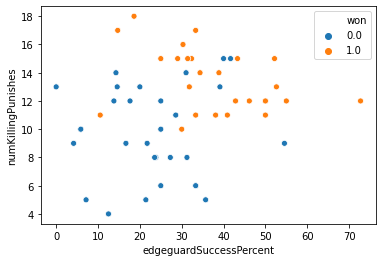

<IPython.core.display.Javascript object>

In [11]:
sns.scatterplot(
    x="edgeguardSuccessPercent", y="numKillingPunishes", hue="won", data=ssbm
)
plt.show()

* Fit a model to predict the target variable

In [12]:
model = LogisticRegression(C=5, solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression(C=5)

<IPython.core.display.Javascript object>

* Score the model on the training data

In [13]:
model.score(X_train, y_train)

0.9090909090909091

<IPython.core.display.Javascript object>

* Score the model on the testing data

In [14]:
model.score(X_test, y_test)

0.75

<IPython.core.display.Javascript object>

---
* overfitting = test scores << train scores
    * revisit preprocessing?
    * maybe adjust hyperparameters
    * can we reduce features w/o underfitting?
    * maybe PCA? Accuracy at the expense of interpretability
    
* underfitting = train score low
    * other features to add?
    * revisit preprocessing steps
---

Hyper is for the typer lol
Everything being adjusted by the typer is a hyperparameter

**Adjustments:**
    1. k=2 >> k=4 = same accuracy
    2. C=5 in LogisticRegression() = test score 0.66 >> 0.75